# World Happiness Data Analysis and Visualization

### Used Libraries
1. NumPy (Numerical Python)
2. Pandas
3. Matplotlib
4. Seaborn
5. Plotly
6. Missingno

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization tools
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2016.csv
/kaggle/input/world-happiness/2015.csv


### Content:
1. Missingo - Missing Data
2. Data Cleaning
3. Seaborn - Heatmap
4. Seaborn - Bar Plot
5. Plotly - Line and Scatter Plot
6. Plotly - Radar Chart
7. Plotly - Box Plot
8. Plotly - 3D Scatter Plot

### Reading Data

In [2]:
df2015 = pd.read_csv("../input/world-happiness/2015.csv")
df2016 = pd.read_csv("../input/world-happiness/2016.csv")
df2017 = pd.read_csv("../input/world-happiness/2017.csv")

In [3]:
df2017.sample(5)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
83,Morocco,84,5.235,5.318341,5.151659,0.878115,0.774864,0.597711,0.408158,0.032210,0.087763,2.456189
93,Vietnam,94,5.074,5.147281,5.000719,0.788548,1.277491,0.652169,0.571056,0.234968,0.087633,1.462319
14,Ireland,15,6.977,7.043352,6.910649,1.535707,1.558231,0.809783,0.573110,0.427858,0.298388,1.773869
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
149,Togo,150,3.495,3.594038,3.395962,0.305445,0.431883,0.247106,0.380426,0.196896,0.095665,1.837229


In [4]:
df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


In [5]:
df2017.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

# Missingno - Missing Data

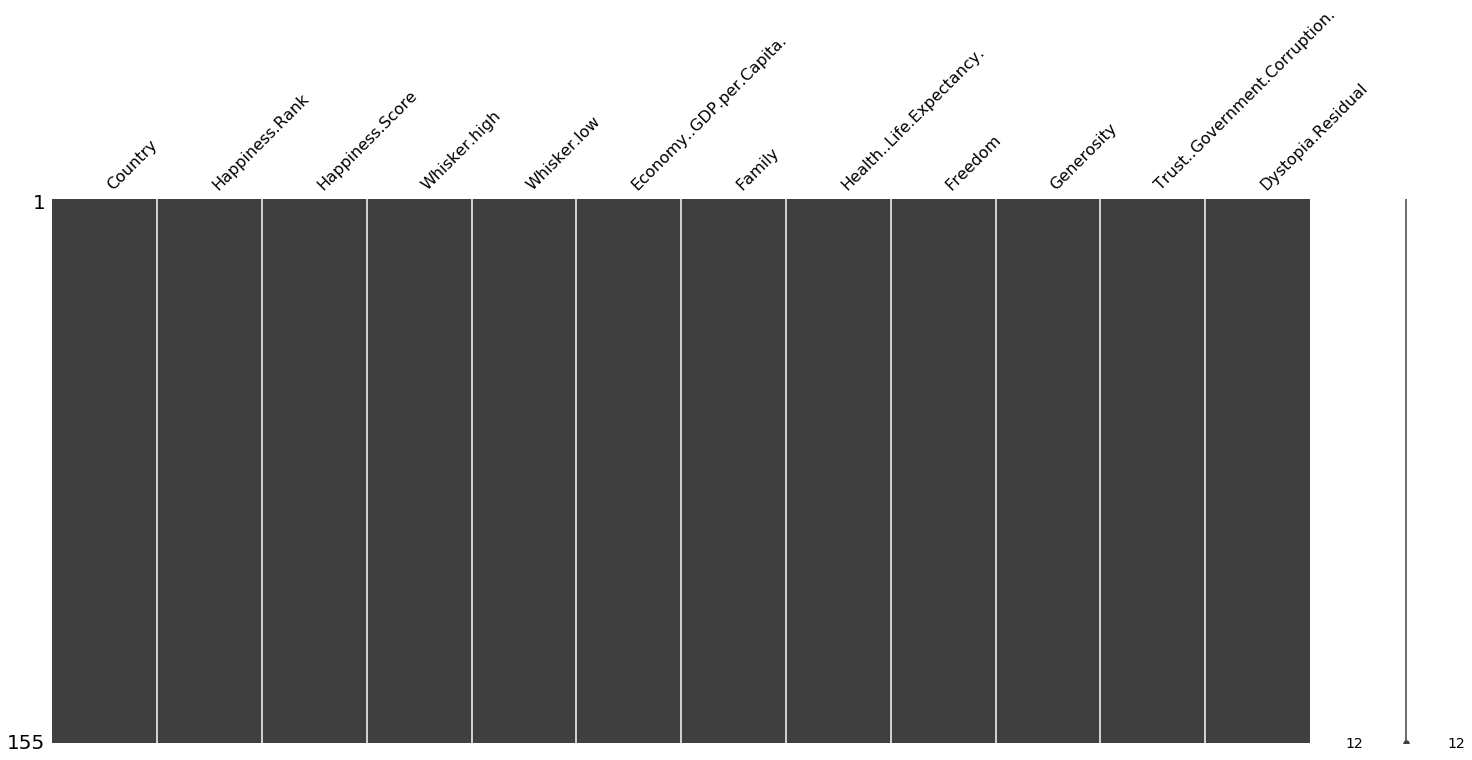

In [6]:
import missingno as msno
msno.matrix(df2017)
plt.show()

# Data Cleaning

In [7]:
df2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [8]:
df2017.columns=[each.replace(".","") for each in df2017.columns]
df2016.columns=[each.replace(" ","") for each in df2016.columns]
df2015.columns=[each.replace(" ","") for each in df2015.columns]

In [9]:
df2017.columns

Index(['Country', 'HappinessRank', 'HappinessScore', 'Whiskerhigh',
       'Whiskerlow', 'EconomyGDPperCapita', 'Family', 'HealthLifeExpectancy',
       'Freedom', 'Generosity', 'TrustGovernmentCorruption',
       'DystopiaResidual'],
      dtype='object')

# Seaborn - Heatmap
### Relationship between columns
* 01 --> Direct proportion
* 00 --> No relationship
* -1 --> İnverse proportion

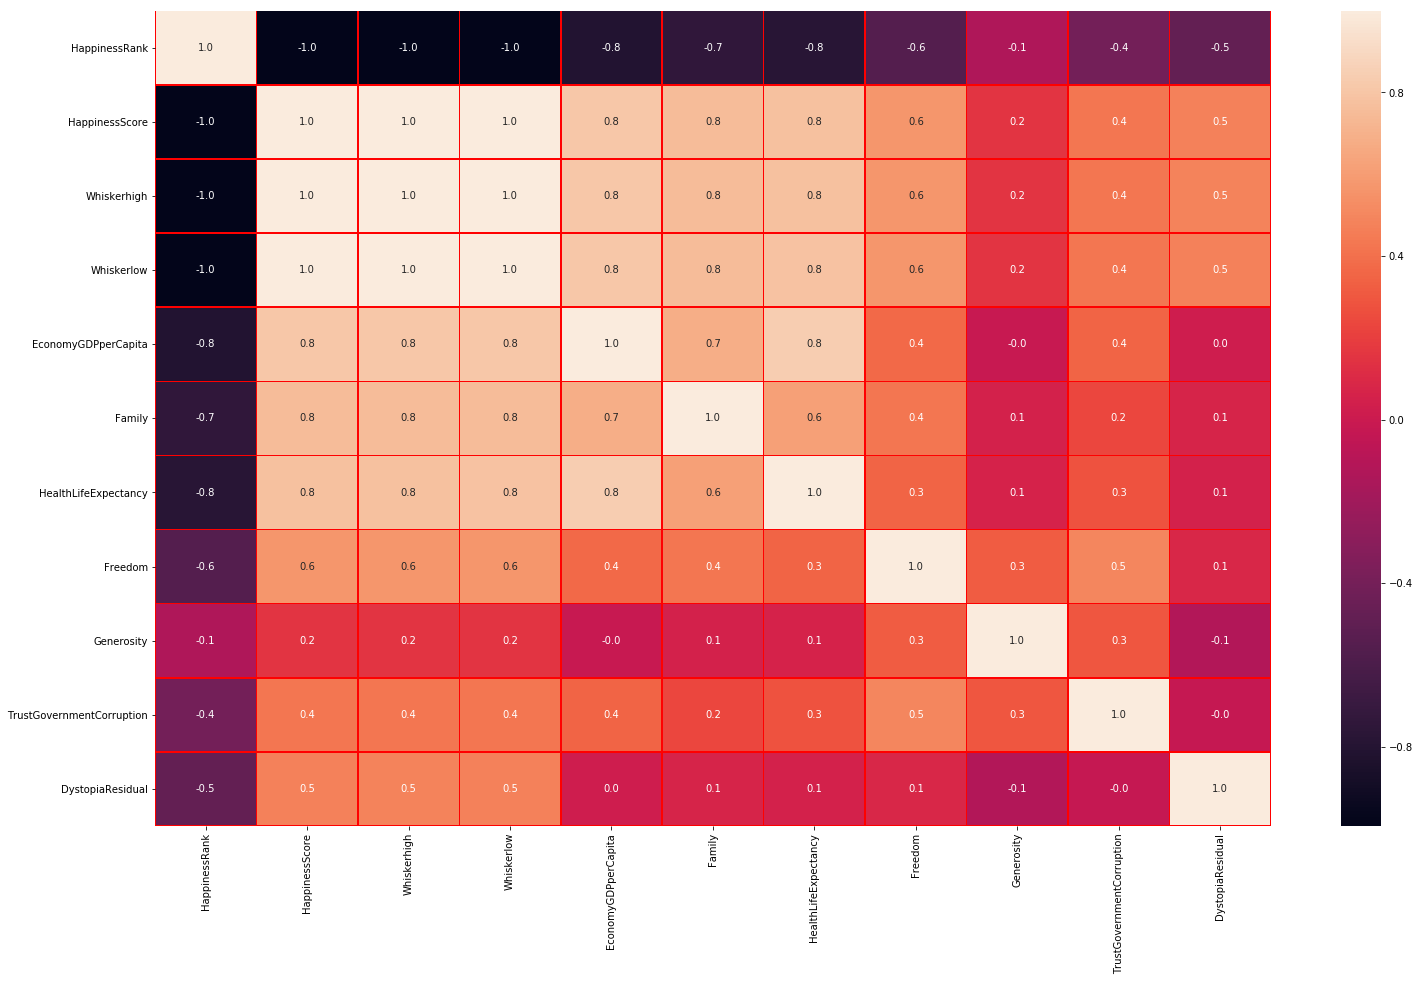

In [10]:
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df2017.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

# Seaborn - Bar Plot

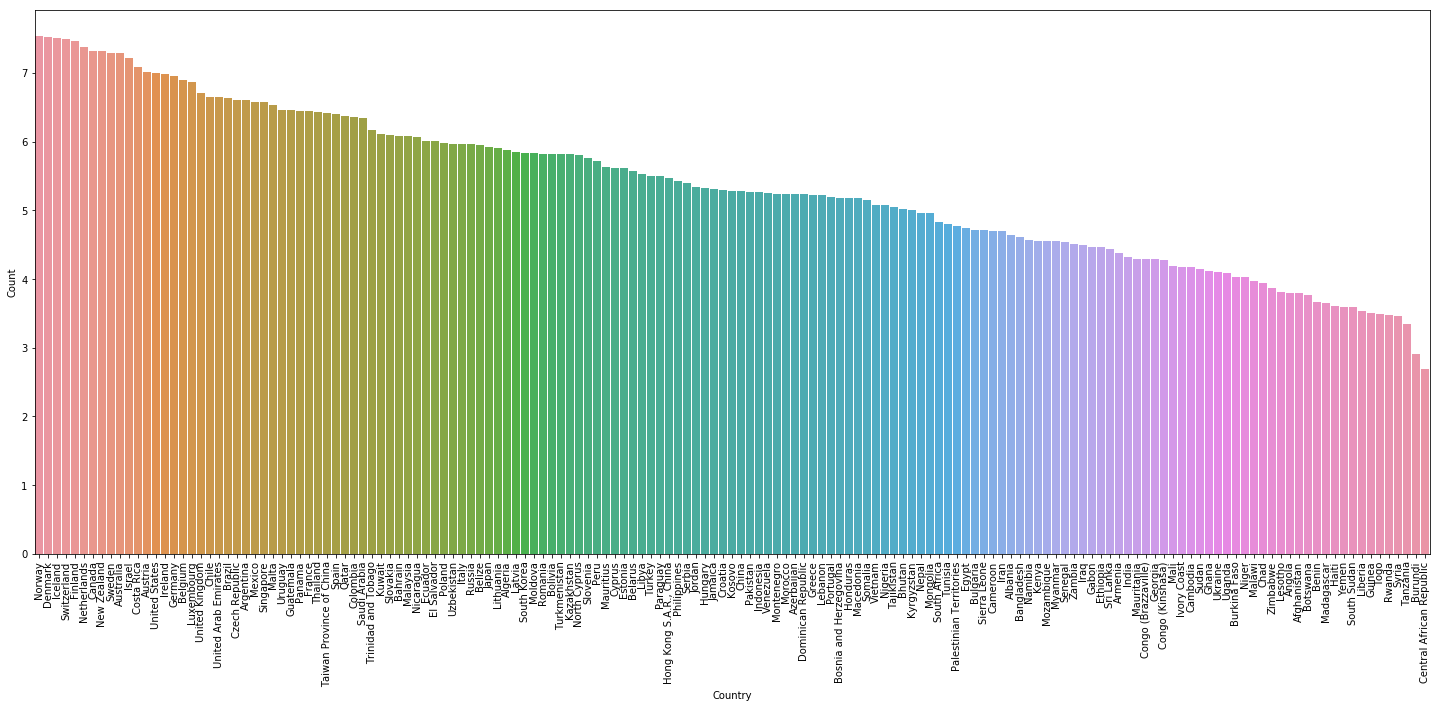

In [11]:
plt.figure(figsize=(25,10))
sns.barplot(x=df2017.Country, y=df2017.HappinessScore)
plt.xticks(rotation= 90)
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# Plotly - Line and Scatter Plot ( Interactive )

In [12]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df2017.HappinessRank, y=df2017.EconomyGDPperCapita,
                    mode='lines+markers',
                    name='2017'))
fig.add_trace(go.Scatter(x=df2016.HappinessRank, y=df2016["Economy(GDPperCapita)"],
                    mode='lines+markers',
                    name='2016'))
fig.add_trace(go.Scatter(x=df2015.HappinessRank, y=df2015["Economy(GDPperCapita)"],
                    mode='lines+markers',
                    name='2015'))
fig.show()

# Plotly - Radar Chart ( Interactive )
### Turkey vs Norway values

In [13]:
categories = ['HappinessScore','EconomyGDPperCapita','Generosity','Freedom', 'Family']
r1=[df2017[each][df2017["Country"]=="Turkey"].mean()/df2017[each].max()  for each in categories]
r2=[df2017[each][df2017["Country"]=="Norway"].mean()/df2017[each].max()  for each in categories]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=r1,
      theta=categories,
      fill='toself',
      name='Turkey'
))
fig.add_trace(go.Scatterpolar(
      r=r2,
      theta=categories,
      fill='toself',
      name='Norway'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False
)

fig.show()

# Plotly - Box Plot ( Interactive )
### 2017, 2016 vs 2015 (min,q1,median,q3,max value)

In [14]:
fig = go.Figure()
# Use x instead of y argument for horizontal plot
fig.add_trace(go.Box(x=df2017.HappinessScore, name='2017'))
fig.add_trace(go.Box(x=df2016.HappinessScore, name='2016'))
fig.add_trace(go.Box(x=df2015.HappinessScore, name='2015'))

fig.show()

# Plotly - 3D Scatter Plot ( Interactive )
* X = Economy GDP per Capita
* Y = Health Life Expectancy
* Z = Family

In [15]:
# trace1
trace1 = go.Scatter3d(
    x=df2017.EconomyGDPperCapita,
    y=df2017.HealthLifeExpectancy,
    z=df2017.Family,
    mode='markers',
    name = "2017",
    marker=dict(
        color='rgb(217, 100, 100)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )
    )
)
# trace2
trace2 = go.Scatter3d(
    x=df2016["Economy(GDPperCapita)"],
    y=df2016["Health(LifeExpectancy)"],
    z=df2016.Family,
    mode='markers',
    name = "2016",
    marker=dict(
        color='rgb(54, 170, 127)',
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.1
        )
    )
)
# trace3
trace3 = go.Scatter3d(
    x=df2015["Economy(GDPperCapita)"],
    y=df2015["Health(LifeExpectancy)"],
    z=df2015.Family,
    mode='markers',
    name = "2015",
    marker=dict(
        color='rgb(150, 170, 25)',
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.1
        )
    )
)
data = [trace1, trace2, trace3]
layout = go.Layout(
    title = '2015 , 2016 and 2017 values',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

# Thank You

If you have any suggestion or advice or feedback, I will be very appreciated to hear them.
### Also there are other visualization kernels
* [FİFA 19 Player Data Analysis and Visualization EDA](https://www.kaggle.com/ismailsefa/f-fa-19-player-data-analysis-and-visualization-eda)
* [Crimes Data Analysis and Visualzation (EDA)](https://www.kaggle.com/ismailsefa/crimes-data-analysis-and-visualzation-eda#Crimes-Data-Analysis-and-Visualzation-(EDA)
* [Google Play Store Apps Data Analysis (EDA)](https://www.kaggle.com/ismailsefa/google-play-store-apps-data-analysis-eda/notebook)